PROJECT OVERVIEW.

Flu (influenza) is an infection of the nose, throat and lungs, which are part of the respiratory system and The H1N1 flu, sometimes called swine flu, is a type of influenza A virus. During the 2009-10 flu season, a new H1N1 virus began causing illness in humans. It was often called swine flu and was a new combination of influenza viruses that infect pigs, birds and humans.
 My task is to build a model that can use the patient health and demographics data collected following the 2009 H1N1 virus outbreak to predict which patients were not likely to get the seasonal flu vaccine.The priority will be  specificity which is a measure of how well a model correctly identifies the TRUE NEGATIVES(non-administered cases) out of all the actual negatives in the dataset. It also indicates the ability of the model to avoid FALSE POSITIVES (classifying non-administered cases as administered).

PROBLEM STATEMENT.

As requested by our stakeholders, the Centers for Disease Control and Prevention (CDC) and the World Health Organization (WHO), I have undertaken an analysis aimed at improving the vaccination rate among individuals who did not receive the seasonal flu vaccine because however it does not necessarily prevent the h1n1 the seasonal flu_vaccine provides protection against other strains of the flu virus that can cause illness and complications in the future.


 The objective is to analyze patient health and demographic data collected during the vaccination campaign to gain insights into the factors contributing to low vaccination rates within this specific group. By identifying these factors, I can develop effective strategies to address them and ultimately increase the vaccination rate among the target population.

Determining the Project success criteria:


We are going to use the following algorithms to come up with our predictive models:


Random forest Classifier


Decison Tree


k-nearest neighbors (k-NN)

Gradient Boosting


The success metrics for the mentioned algorithms are:


Accuracy score of above 65%


Specificity


Confusion box



DATA UNDERSTANDING.

To build a model I used The National 2009 H1N1 Flu Survey data https://www.drivendata.org/competitions/66/flu-shot-learning/. This survey was conducted in the United States during the H1N1 influenza pandemic in 2009. It aimed to gather data on the prevalence of H1N1 influenza infection, vaccine uptake, and public attitudes and behaviors related to the pandemic.The survey was conducted by the U.S. Centers for Disease Control and Prevention (CDC) in collaboration with other public health agencies and organizations. It involved interviews with a representative sample of individuals across the country to gather information about their experiences and behaviors during the H1N1 flu outbreak.

IMPORTING MODULES.

In [146]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import *
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

IMPORTING DATA.

In [147]:
# Loading and reading the data from csv files.
df = pd.read_csv('training_set_features.csv')
target = pd.read_csv('training_set_labels.csv')

In [148]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [149]:
target.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


This target out above put basically represent  A binary variable indicating whether the respondent received the seasonal vaccine and h1n1 vaccine. A value of 0 typically indicates that the respondent did not receive the seasonal vaccine, while a value of 1 indicates that the respondent received the vaccine.

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [151]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


-  Both of our data frames have the same amount of of entries at 26,707 which appear in (Floats,Integers and Objects in the training_set_features while Integers in training_set_labels ) and they both have the common feature of 'respondent_id'. We can see that the Training Data has 35 feature columns and each of them are a response to a survey question. The survey questions cover a variety of topics such as opinion, behaviors, and their demographics. The training_set_labels correspond to the training_set_features and focus on the two targets variables, H1N1 and seasonal vaccines. These are binary variables with 1 indicating that a person received the vaccine and 0 indicating that a person did not receive the vaccine.

- Features column descriptions from DrivenData:
    - respondent_id: A unique and random identifier.
    - h1n1_concern: Level of concern of h1n1 virus.
    - h1n1_knowledge: Level of H1N1 virus knowledge.
    - behavioral_antiviral_meds: Behavioral Indicator- Taking anti-viral medication.
    - behavioral_avoidance: Behavioral Indicator- Avoid close contact with others with flulike symptoms.
    - behavioral_face_mask: Behavioral Indicator- Bought a face mask.
    - behavioral_wash_hands: Behavioral Indicator- Washing hands.
    - behavioral_large_gatherings: Behavioral Indicator- Reduced time at large gatherings.
    - behavioral_outside_home: Behavioral Indicator- Reduced contact outside the home.
    - behavioral_touch_face: Behavioral Indicator- Avoid touching eyes, nose, or mouth.
    - doctor_recc_h1n1: H1N1 flu vaccine was recommended by doctor. (binary)
    - doctor_recc_seasonal: Seasonal flu vaccine was recommended by doctor. (binary)
    - chronic_med_condition: Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
    - child_under_6_months: Close contact with child under 6 months of age.
    - health_worker: Is a healthcare worker. (binary)
    - health_insurance: Has health insurance. (binary)
    - opinion_h1n1_vacc_effective: Opinion- Effectiveness of H1N1 vaccine.
    - opinion_h1n1_risk: Opinion- Risk of getting sick with H1N1 flu without vaccine.
    - opinion_h1n1_sick_from_vacc: Opinion- Worry about getting sick from the H1N1 vaccine.
    - opinion_seas_vacc_effective: Opinion- Effectiveness of seasonal vaccine.
    - opinion_seas_risk: Opinion- Risk of getting sick with the seasonal flu without vaccine.
    - opinion_seas_sick_from_vacc: Opinion- Worry about getting sick from the seasonal vaccine.
    - age_group: Age group of respondent.
    - education: Adult self-reported education level.
    - race: Race of respondent.
    - sex: Sex of respondent.
    - income_poverty: Poverty status of household.
    - marital_status: Marital status of respondent.
    - employment_status: Employment status of respondent.
    - hhs_geo_region: Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
    - census_msa: Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
    - household_adults: Number of adults in the houshold (other than respondent).
    - household_children: Number of children in the houshold.
    - employment_industry: Type of industry respondent is employed in. (values are represented as short random character strings)
    - employment_occupation: Type of occupation of respondent. Values are represented as short random character strings.

DATA PREPARATION AND CLEANING.

In [152]:
# checking for duplicated values
df.duplicated().sum()

0

In [153]:
# checking for duplicated values
target.duplicated().sum()

0

In [154]:
#checking null values in our dataframe
null_counts = df.isnull().sum()
print("Null value counts:\n", null_counts)

Null value counts:
 respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty    

REMOVING NULL VALUES.

In [155]:
# Removing rows with null values
df = df.dropna()

# Removing columns with null values
df = df.dropna(axis=1)

In [156]:
#finding the number of rows and columns remaining
df.shape

(6437, 36)

In [157]:
#Checking null values in our target.
null_counts = target.isnull().sum()
print("Null value counts:\n", null_counts)

Null value counts:
 respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64


Calculate the percentage breakdown of the h1n1 and seasonal distribution.

In [158]:
# Check to see the percentage breakdown of the distribution.
target['seasonal_vaccine'].value_counts(normalize=True)


0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

the visualisation for better vision of the diatribution.

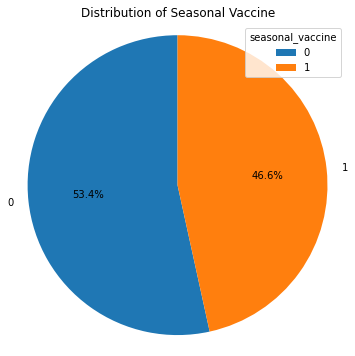

In [159]:

# Percentages for seasonal vaccine target variable
seasonal_percentages = target['seasonal_vaccine'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(seasonal_percentages, labels=seasonal_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Seasonal Vaccine')
plt.legend(title='seasonal_vaccine', loc='best')
plt.axis('equal')
plt.show()


In [160]:
target['h1n1_vaccine'].value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

pie chart visualisation of the h1n1_vaccine distribution

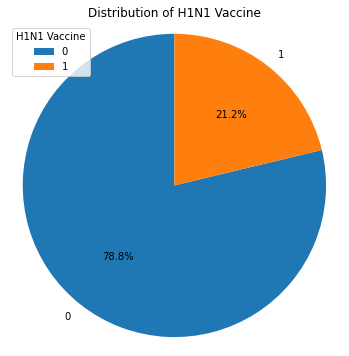

In [161]:

# Percentages for h1n1 vaccine target variable
h1n1_percentages = target['h1n1_vaccine'].value_counts(normalize=True) * 100

# Create a pie chart for h1n1 vaccine
plt.figure(figsize=(6, 6))
plt.pie(h1n1_percentages, labels=h1n1_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of H1N1 Vaccine')
plt.axis('equal')
plt.legend(title='H1N1 Vaccine', loc='best')
plt.show()


Our primary Dataset for the study the seasonal_vaccine seems to be more balanced than the h1n1_vaccine.

Merge my target to my df and target common using the column respondent_id to dissect it further as one.

In [162]:
# Merge the df and target together to form the new df.
df = df.join(target.set_index('respondent_id'), on='respondent_id')

In [163]:
df.head(8)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2.0,0.0,xicduogh,qxajmpny,1,1
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,xicduogh,ccgxvspp,1,1
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,3.0,wxleyezf,emcorrxb,0,0
17,17,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,rucpziij,xtkaffoo,0,0
21,21,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,ldnlellj,mxkfnird,0,1
22,22,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,fpwskwrf,"MSA, Not Principle City",2.0,1.0,wxleyezf,emcorrxb,0,0


Look for duplicates in the merging columnn 'respondent_id'

In [164]:
df['respondent_id'].duplicated().sum()

0

Perform Exploratory Data Analysis


viewing the object columns for analysis.

In [165]:
string_columns = df.select_dtypes(include='object').columns.tolist()
# Print the values of each relevant column
for column in string_columns:
    print(f"Values in {column}:")
    print(df[column].unique())
    print()

Values in age_group:
['35 - 44 Years' '45 - 54 Years' '55 - 64 Years' '18 - 34 Years'
 '65+ Years']

Values in education:
['12 Years' 'Some College' 'College Graduate' '< 12 Years']

Values in race:
['White' 'Black' 'Other or Multiple' 'Hispanic']

Values in sex:
['Male' 'Female']

Values in income_poverty:
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']

Values in marital_status:
['Not Married' 'Married']

Values in rent_or_own:
['Rent' 'Own']

Values in employment_status:
['Employed']

Values in hhs_geo_region:
['bhuqouqj' 'lzgpxyit' 'oxchjgsf' 'qufhixun' 'fpwskwrf' 'mlyzmhmf'
 'dqpwygqj' 'kbazzjca' 'atmpeygn' 'lrircsnp']

Values in census_msa:
['MSA, Not Principle  City' 'Non-MSA' 'MSA, Principle City']

Values in employment_industry:
['pxcmvdjn' 'xicduogh' 'wxleyezf' 'rucpziij' 'ldnlellj' 'fcxhlnwr'
 'vjjrobsf' 'arjwrbjb' 'xqicxuve' 'wlfvacwt' 'phxvnwax' 'cfqqtusy'
 'mcubkhph' 'saaquncn' 'mfikgejo' 'atmlpfrs' 'haxffmxo' 'nduyfdeo'
 'qnlwzans' 'dotnnunm' 'msuufmds']

Value

Change the columns 'employment_occupation', 'employment_industry', 'hhs_geo_region' that are in form of random unrecognisable strings to make them interpratable because they might be an integral part of my Analysis.

Change employment_occupation column to integers.

In [166]:
# Mapping dictionary for the new values
occupation_mapping = {'xgwztkwe': '1','xqwwgdyp': '2','qxajmpny': '3','ccgxvspp': '4','emcorrxb': '5',
                      'xtkaffoo': '6','mxkfnird': '7','bxpfxfdn': '8','cmhcxjea': '9','hfxkjkmi': '10',
                      'oijqvulv': '11','tfqavkke': '12','kldqjyjy': '13','haliazsg': '14','dlvbwzss': '15',
                      'rcertsgn': '16','vlluhbov': '17','xzmlyyjv': '18','dcjcmpih': '19','uqqtjvyb': '20',
                      'pvmttkik': '21','hodpvpew': '22','ukymxvdu': '23'}

# Change the values in the "employment_occupation" column
df['employment_occupation'] = df['employment_occupation'].replace(occupation_mapping)




Change employment_industry column to integers.

In [167]:
# Mapping dictionary for the new values
industry_mapping = {'pxcmvdjn': '1','xicduogh': '2','wxleyezf': '3','rucpziij': '4','ldnlellj': '5',
                    'fcxhlnwr': '6','vjjrobsf': '7','arjwrbjb': '8','xqicxuve': '9','wlfvacwt': '10',
                    'phxvnwax': '11','cfqqtusy': '12','mcubkhph': '13','saaquncn': '14','mfikgejo': '15',
                    'atmlpfrs': '16','haxffmxo': '17','nduyfdeo': '18','qnlwzans': '19','dotnnunm': '20',
                    'msuufmds': '21'}

# Change the values in the "employment_industry" column
df['employment_industry'] = df['employment_industry'].replace(industry_mapping)


Change hhs_geo_region column to understandable object.

In [168]:
# Mapping dictionary for the new values
region_mapping = {'bhuqouqj': 'region_A','lzgpxyit': 'region_B','oxchjgsf': 'region_C','qufhixun': 'region_D',
                  'fpwskwrf': 'region_E','mlyzmhmf': 'region_F','dqpwygqj': 'region_G','kbazzjca': 'region_H',
                  'atmpeygn': 'region_I','lrircsnp': 'region_J'}

# Change the values in the "hhs_geo_region" column
df['hhs_geo_region'] = df['hhs_geo_region'].replace(region_mapping)


In [169]:
new_df = df
print(new_df.columns)


Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')


convert floats in the DataFrame into integers.

In [170]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,region_A,"MSA, Not Principle City",0.0,0.0,1,1,0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,region_A,Non-MSA,2.0,0.0,1,2,1,1
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Employed,region_B,"MSA, Not Principle City",2.0,0.0,2,3,1,1
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Own,Employed,region_C,Non-MSA,1.0,2.0,2,4,1,1
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,region_B,"MSA, Not Principle City",1.0,3.0,3,5,0,0


In [171]:
# stripping and converting floats to integers
float_col = new_df.select_dtypes(include=['float64']) 
for col in float_col.columns.values:
     new_df[col] =new_df[col].astype('int64')

Checking the distribution of relevant columns.

Define a value count function to see the distribution of the relevant columns

In [172]:

def get_column_value_counts(new_df, columns):
    value_counts = {}
    for column in columns:
        value_counts[column] = new_df[column].value_counts()
    return value_counts

columns_to_count = ['h1n1_concern', 'h1n1_knowledge',
                    'behavioral_antiviral_meds', 'behavioral_avoidance',
                    'behavioral_face_mask', 'behavioral_wash_hands',
                    'behavioral_large_gatherings', 'behavioral_outside_home',
                    'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
                    'chronic_med_condition', 'child_under_6_months', 'health_worker',
                    'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
                    'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
                    'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
                    'education', 'race', 'sex', 'income_poverty', 'marital_status',
                    'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
                    'household_adults', 'household_children', 'employment_industry',
                    'employment_occupation']
counts = get_column_value_counts(df, columns_to_count)

# Print value counts for each column
for column, value_count in counts.items():
    print(f"Value counts for column '{column}':\n{value_count}\n")



Value counts for column 'h1n1_concern':
2    2530
1    2347
0     859
3     701
Name: h1n1_concern, dtype: int64

Value counts for column 'h1n1_knowledge':
1    3503
2    2582
0     352
Name: h1n1_knowledge, dtype: int64

Value counts for column 'behavioral_antiviral_meds':
0    6083
1     354
Name: behavioral_antiviral_meds, dtype: int64

Value counts for column 'behavioral_avoidance':
1    4625
0    1812
Name: behavioral_avoidance, dtype: int64

Value counts for column 'behavioral_face_mask':
0    6042
1     395
Name: behavioral_face_mask, dtype: int64

Value counts for column 'behavioral_wash_hands':
1    5271
0    1166
Name: behavioral_wash_hands, dtype: int64

Value counts for column 'behavioral_large_gatherings':
0    4701
1    1736
Name: behavioral_large_gatherings, dtype: int64

Value counts for column 'behavioral_outside_home':
0    4824
1    1613
Name: behavioral_outside_home, dtype: int64

Value counts for column 'behavioral_touch_face':
1    4284
0    2153
Name: behavioral_

Visualisation of the relevant columns against the seasonal vaccine value counts.

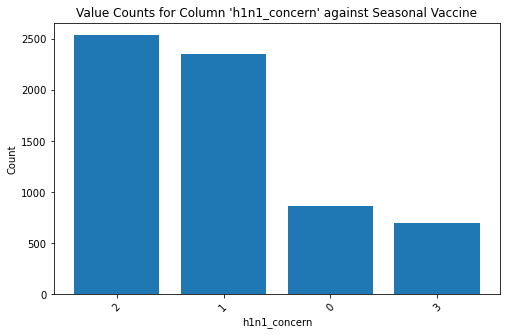

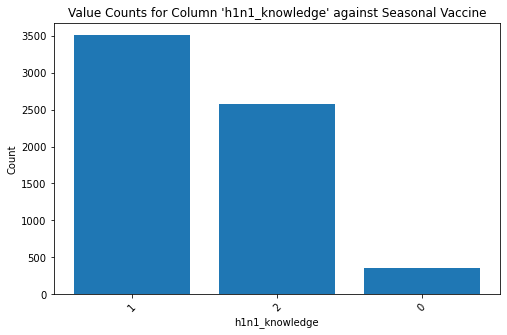

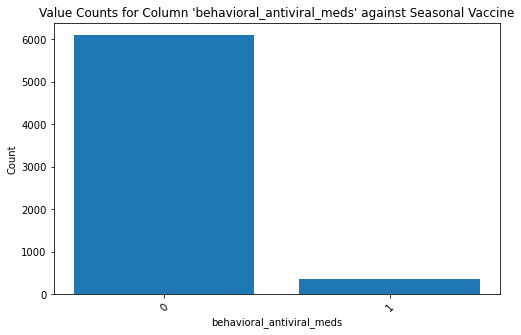

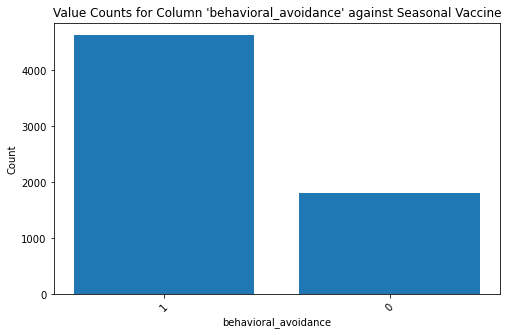

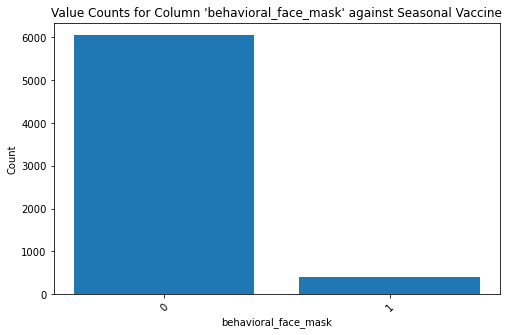

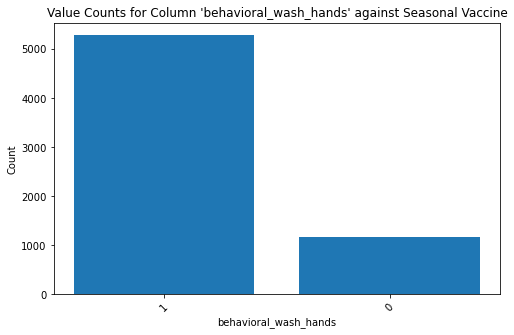

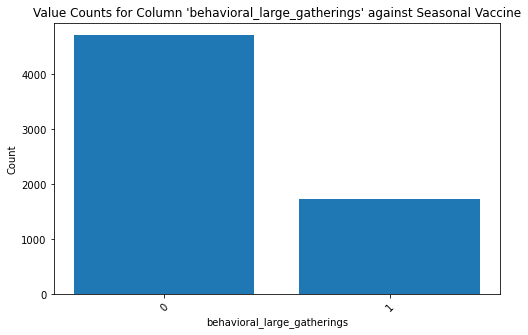

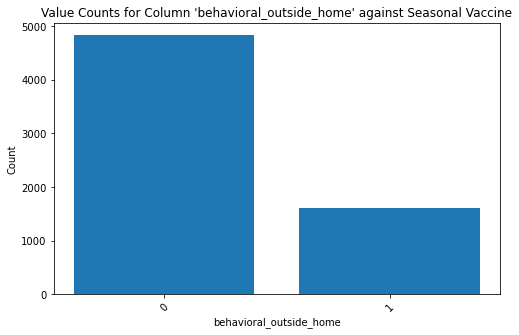

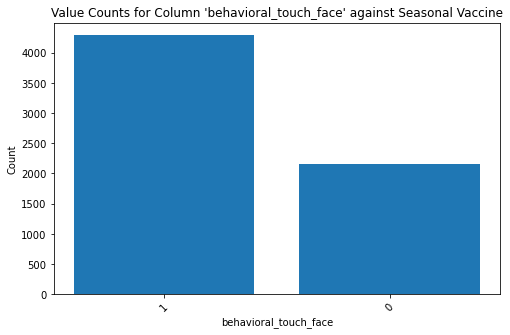

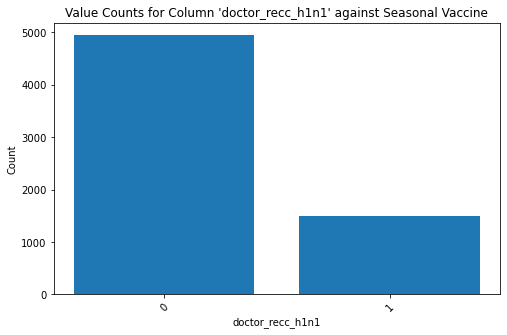

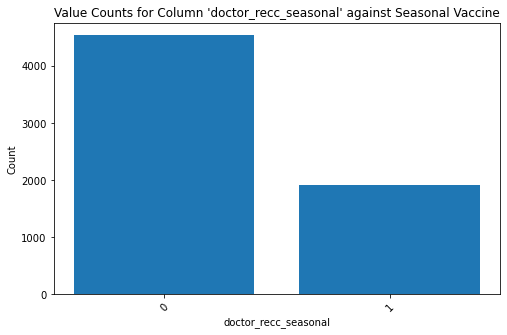

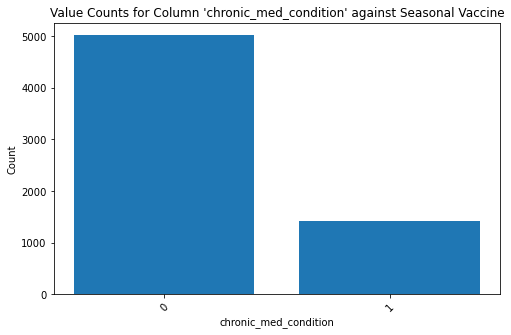

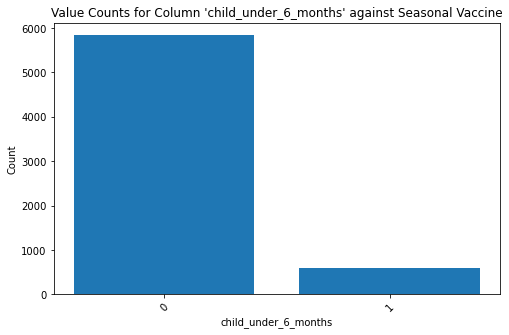

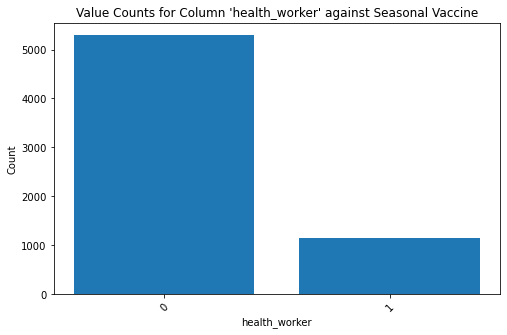

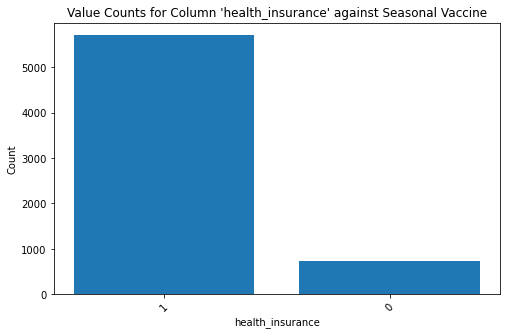

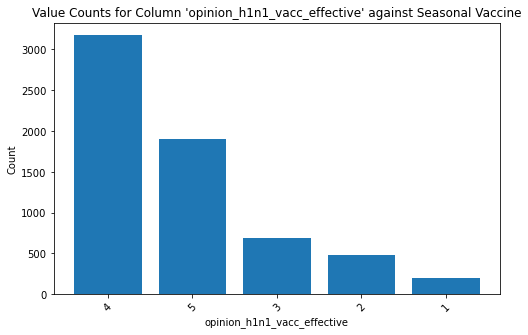

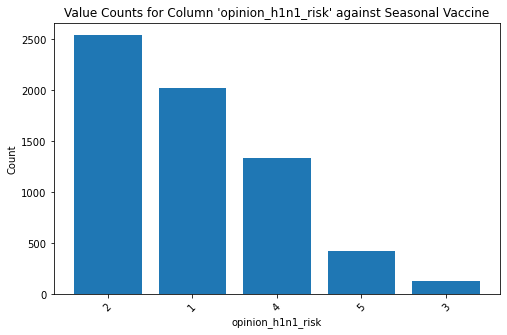

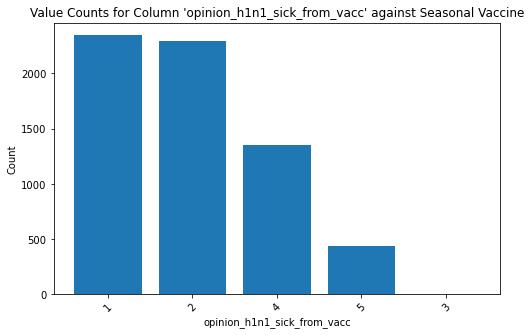

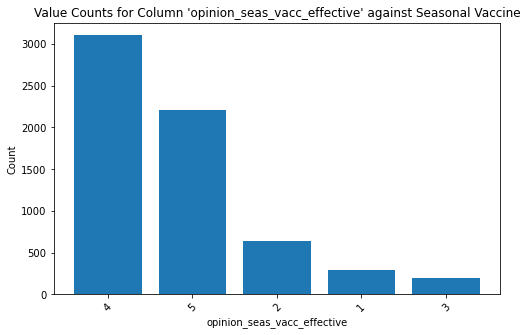

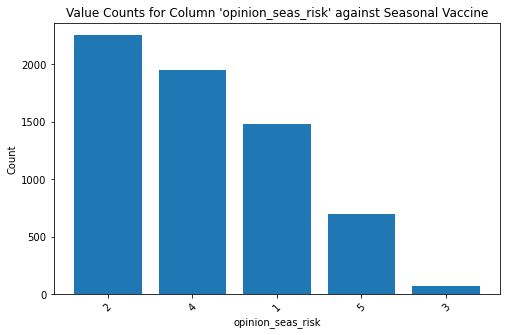

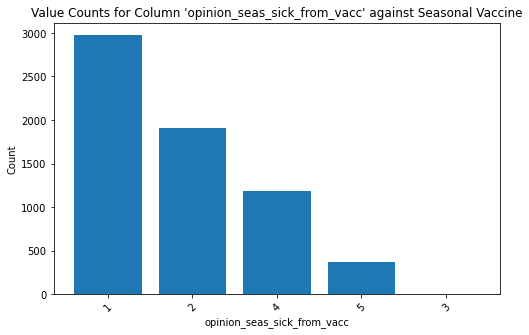

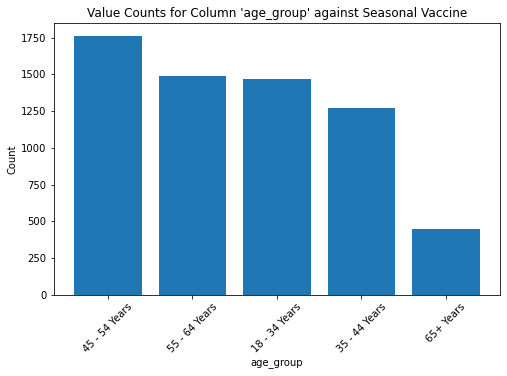

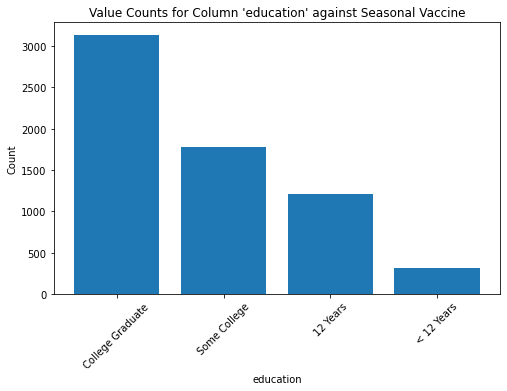

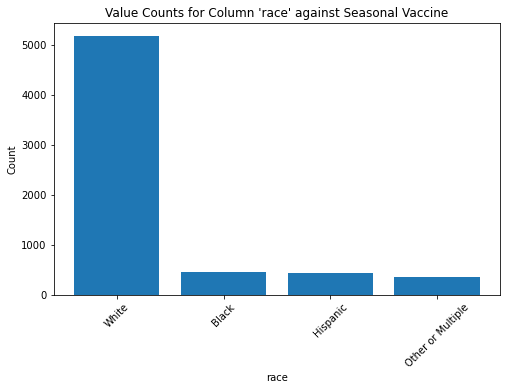

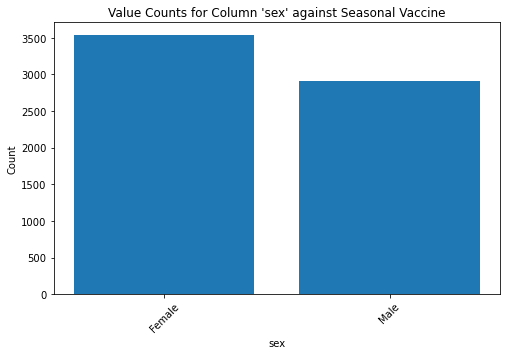

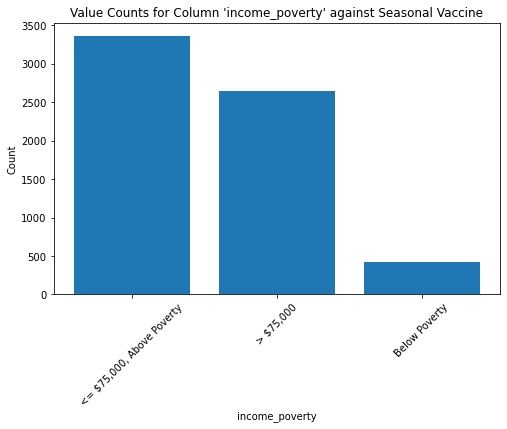

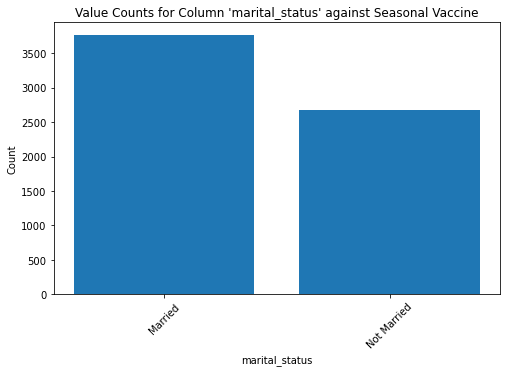

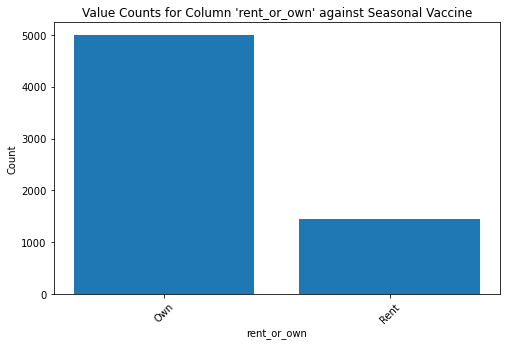

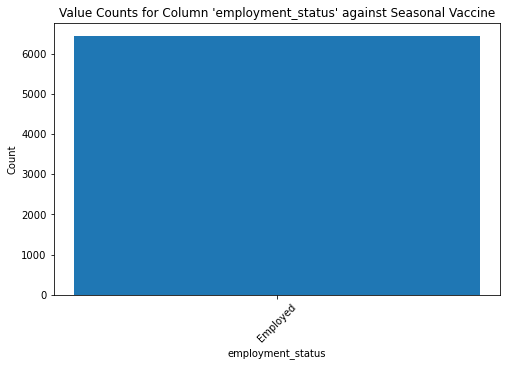

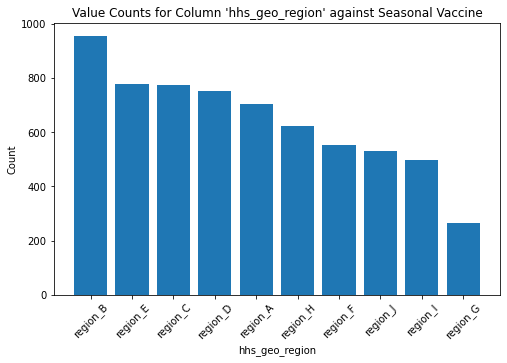

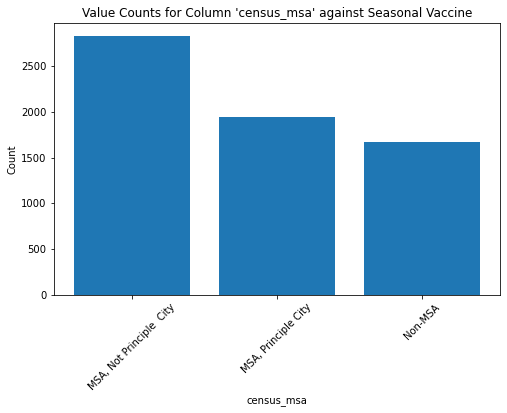

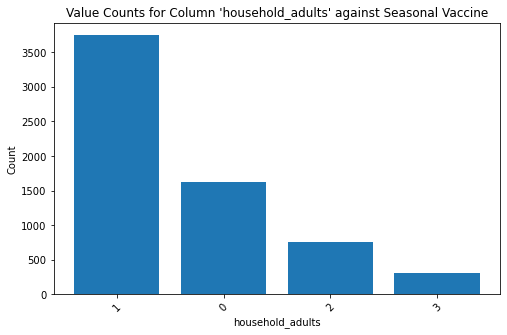

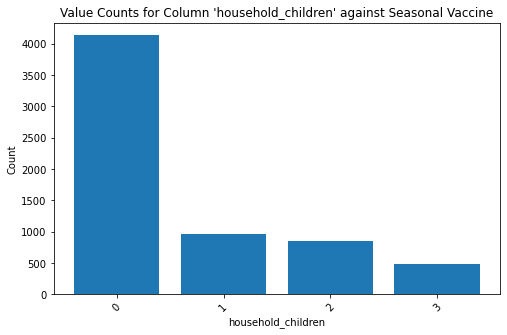

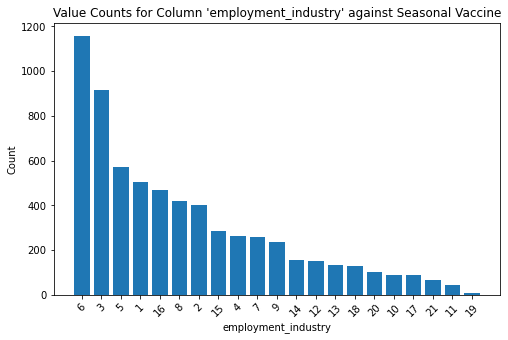

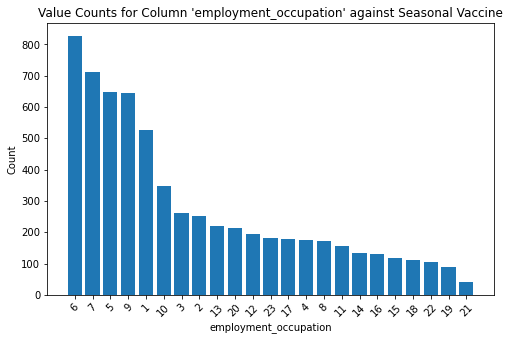

In [173]:
# Iterate over each column and its value counts
for column, value_count in counts.items():
    # Create a bar plot
    plt.figure(figsize=(8, 5))
    plt.bar(value_count.index.astype(str), value_count.values)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"Value Counts for Column '{column}' against Seasonal Vaccine")
    plt.xticks(rotation=45)
    plt.show()



The value counts for most of the above variables' columns are imbalanced, which might affect the model's performance. It is recommended to handle imbalanced classes appropriately, such as using techniques like oversampling, undersampling, or using class weights during model training to mitigate the impact of the imbalance on the model's predictions.So I introduce oversampling by SMOTE(Synthetic Minority Over-sampling Technique) SMOTE works by selecting a minority class sample and generating synthetic samples along the line segments connecting its neighboring minority class samples.

SPLITTING THE DATA INTO TRAINING AND TESTING SETS AND OVERSAMPLING THE MINORITY CLASS WITH SMOTE.

Define my relevant variables and target variables for the study.

In [174]:
relevant_columns = ['h1n1_concern', 'h1n1_knowledge',
                    'behavioral_antiviral_meds', 'behavioral_avoidance',
                    'behavioral_face_mask', 'behavioral_wash_hands',
                    'behavioral_large_gatherings', 'behavioral_outside_home',
                    'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
                    'chronic_med_condition', 'child_under_6_months', 'health_worker',
                    'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
                    'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
                    'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
                    'education', 'race', 'sex', 'income_poverty', 'marital_status',
                    'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
                    'household_adults', 'household_children', 'employment_industry',
                    'employment_occupation']
target_variable = 'seasonal_vaccine'

In [175]:
# Set up X and y
# Extract the relevant_columns  and target variable
X = new_df[relevant_columns]
y = new_df[target_variable]

In [176]:

# One-hot encode the categorical variables
X_cat = X.select_dtypes(include=['object'])
for col in X_cat.columns:
    one_hot = pd.get_dummies(X[col], prefix=col, drop_first=True)
    X = pd.concat([X, one_hot], axis=1)
    X.drop(col, axis=1, inplace=True)

 The identified the relevant features using the chi-squared test,I will use those selected features for modeling my machine learning algorithm.

A chi-squared test is a statistical test used to determine if there is a significant association between two categorical variables. It is commonly used to analyze the relationship between two variables.The test calculates the difference between the observed frequencies and the expected frequencies under the assumption of independence. If the difference is large enough, it suggests that the variables are not independent and that there is a significant association.

In [177]:
# Perform feature selection using chi-squared test
selector = SelectKBest(score_func=chi2, k=5)  # Select the top 5 features
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['doctor_recc_seasonal', 'health_worker', 'opinion_h1n1_risk',
       'opinion_seas_vacc_effective', 'opinion_seas_risk'],
      dtype='object')


These five features have been selected as the most relevant or informative ones according to the chi-squared test for feature selection

In [178]:
# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_feature_indices]

In [179]:
# Subset the dataset with selected features
X_selected = X[selected_features]

In [180]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


First using  OneHotEncoder I will replace my categorical_cols with the names of the categorical columns in my dataset and numerical_cols with the names of the numerical columns. This way, I can ensure that all the variables are in numerical format before applying SMOTE.

In [181]:
# One-hot encode the categorical variables
# Selecting columns with 'object' data type
X_train_cat = X_train.select_dtypes(include=['object']).columns.tolist()
# One-hot encoding the selected columns
for col in X_train_cat:
    one_hot = pd.get_dummies(X_train[col], prefix=col, drop_first=True)
    X_train = pd.concat([X_train, one_hot], axis=1)
    X_train.drop(col, axis=1, inplace=True)

In [182]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [183]:
y_train.value_counts(normalize=True)

0    0.53894
1    0.46106
Name: seasonal_vaccine, dtype: float64

In [184]:
y_test.value_counts(normalize=True)

0    0.555901
1    0.444099
Name: seasonal_vaccine, dtype: float64

MODELLING.

Because my target is categorical I will use classification models.

1.DECISION TREES


Try the first model into the data set

In [185]:
# Create an instance of DecisionTreeClassifier model
dt_model = DecisionTreeClassifier()

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = dt_model.predict(X_train)


Calculate the accuracy score.

In [186]:
# Evaluate the model's accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
# Print the accuracy scores
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 1.0


The training accuracy of the model is 1.0, which means that the model has achieved a perfect accuracy on the training data. However, a high training accuracy does not guarantee good performance on unseen data. The model may be overfitting to the training data, memorizing the training instances without generalizing well to new, unseen instances.So I will employ hyperparameter tuning.

Tune my model with the best hyperparameter.

In [187]:
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Define the hyperparameters to tune
params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'ccp_alpha': [0.0, 0.1, 0.2]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(dt_model, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'ccp_alpha': 0.0, 'max_depth': 7, 'min_samples_split': 10}


Test the tuned model on my test data.

In [188]:
# Create an instance of DecisionTreeClassifier with the best hyperparameters
dt_tuned = DecisionTreeClassifier(ccp_alpha=0.0, max_depth=7, min_samples_split=2)

In [189]:
# Perform cross-validation on the training data
cv_scores = cross_val_score(dt_tuned, X_train, y_train, cv=5)  # Use 5-fold cross-validation

# Calculate and print the average cross-validation score
print("Cross-Validation Scores:", cv_scores)
avg_cv_score = np.mean(cv_scores)
print("Average Cross-Validation Score:", avg_cv_score)

Cross-Validation Scores: [0.7368932  0.74174757 0.73495146 0.79029126 0.74829932]
Average Cross-Validation Score: 0.7504365629747045


Trying out the new model on testing dataset.

In [190]:
# Fit the tuned model on the training data
dt_tuned.fit(X_train, y_train)

# Make predictions on the testing data
y_test_pred = dt_tuned.predict(X_test)

# Evaluate the model's accuracy on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print(f"Testing Accuracy: {test_accuracy}")



Testing Accuracy: 0.7717391304347826


Evaluating the model with a confusion matrix

In [191]:
# Make predictions on the testing data
y_test_pred = dt_tuned.predict(X_test)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)

# Transpose the confusion matrix
confusion_mat = confusion_mat.T

# Display the confusion matrix with actual labels on the x-axis
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[561 139]
 [155 433]]


Lets plot the confusion matrix.

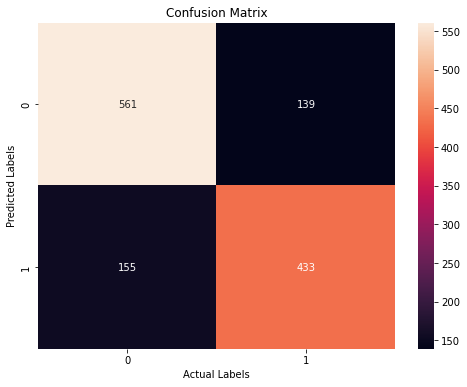

In [192]:

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d")

plt.title("Confusion Matrix")
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()

Calculating specificity.

In [193]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

test_specificity = specificity_score(y_test, y_test_pred)

test_specificity

0.7835195530726257

Calculating specificity.

2.RANDOM FOREST CLASSIFIER.

In [194]:
# Create an instance of RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = rf_model.predict(X_train)

# Evaluate the model's accuracy and precision on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print the accuracy and precision scores
print(f"Training Accuracy: {train_accuracy}")



Training Accuracy: 1.0


In [195]:
# Create an instance of RandomForestClassifier
rf_model = RandomForestClassifier()

# Define the hyperparameters to tune
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search cross-validation
grid_search = GridSearchCV(rf_model, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [196]:
# Create a new instance of RandomForestClassifier with the best hyperparameters
rf_tuned = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=50)

In [197]:
# Perform cross-validation
cv_scores = cross_val_score(rf_tuned, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.76796117 0.78446602 0.77378641 0.80679612 0.76773567]
Average Cross-Validation Score: 0.7801490748865427


In [198]:
# Fit the model on the training data
rf_tuned.fit(X_train, y_train)

# Make predictions on the testing data
y_test_pred = rf_tuned.predict(X_test)

# Evaluate the model's accuracy on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy score
print(f"Testing Accuracy: {test_accuracy}")

Testing Accuracy: 0.7996894409937888


Lets make a confusion matrix

In [199]:
# Make predictions on the testing data
y_test_pred = rf_tuned.predict(X_test)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)

# Transpose the confusion matrix
confusion_mat = confusion_mat.T

# Display the confusion matrix with actual labels on the x-axis
print("Confusion Matrix:")
print(confusion_mat)



Confusion Matrix:
[[593 135]
 [123 437]]


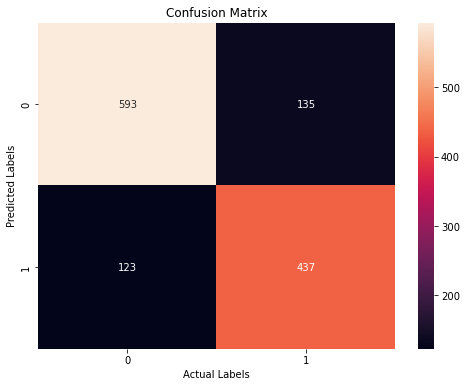

In [200]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d")

plt.title("Confusion Matrix")
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()


Calculate the Specificity.

In [201]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

test_specificity = specificity_score(y_test, y_test_pred)

test_specificity

0.8282122905027933

3.K-NEAREST NEIGHBOR MODEL.

In [202]:
# Create an instance of KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [203]:
# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = knn_model.predict(X_train)

# Evaluate the model's accuracy and precision on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print the accuracy and precision scores
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.8201592542241212


Try hypaparemeter tuning of the model.

In [204]:
# Create an instance of KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # number of neighbors
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'p': [1, 2]  # power parameter for the Minkowski distance metric
}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [205]:

# Create an instance of KNeighborsClassifier model with the best hyperparameters
knn_tuned = KNeighborsClassifier(n_neighbors=9, p=1, weights='uniform')

In [206]:
# Perform cross-validation
cv_scores = cross_val_score(knn_tuned, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("CV Score Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.76397516 0.74611801 0.76068376 0.76689977 0.75369075]
Mean CV Score: 0.7582734897952289
CV Score Standard Deviation: 0.007503174689430174


In [207]:

# Fit the best model on the training data
knn_tuned.fit(X_train, y_train)

# Make predictions on the testing data
y_test_pred = knn_tuned.predict(X_test)

# Evaluate the model's accuracy and precision on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)


# Print the evaluation metrics
print("Testing Accuracy:", test_accuracy)


Testing Accuracy: 0.7740683229813664


Build a confusion matrix for the results of the test data for more insight.

In [208]:
# Fit the model on the training data
knn_model.fit(X_train, y_train)
# Make predictions on the test data
y_test_pred = knn_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Transpose the confusion matrix
cm = cm.T

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[584 166]
 [132 406]]


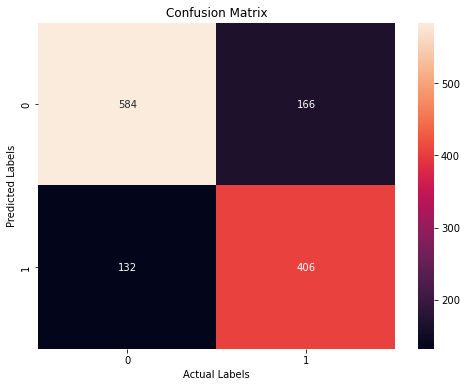

In [209]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")

plt.title("Confusion Matrix")
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()

Calculate specificity.

In [210]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

test_specificity = specificity_score(y_test, y_test_pred)

test_specificity

0.8156424581005587

4.GRADIENT BOOSTING.

In [211]:
# Create a Gradient Boosting Classifier object
gb_model = GradientBoostingClassifier()

In [212]:
# Fit the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = gb_model.predict(X_train)

# Evaluate the model's accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print the accuracy score
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.821712953971645


In [213]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(gb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [214]:
# Create an instance of GradientBoostingClassifier with the best hyperparameters
gb_model = GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=200)

In [215]:
# Perform cross-validation
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.79320388 0.79514563 0.78252427 0.82038835 0.78911565]
Average Cross-Validation Score: 0.7960755564361667


In [216]:
# Make predictions on the testing data
y_test_pred = best_model.predict(X_test)

# Evaluate the model's accuracy on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Testing Accuracy: {test_accuracy}")

Testing Accuracy: 0.8027950310559007


The specificity of 0.84 indicates that the Random Forest Classifier is performing well in correctly identifying true negative cases.Which is an important metric in the study.Having a high specificity means that the model has a low false positive rate, as it is effectively identifying the majority of actual negative cases as negative.



Work out the AUC AUC values to observe  better model performance in distinguishing between positive and negative instances.






In [217]:
# Fit the model on the training data
rf_tuned.fit(X_train, y_train)
# Make predictions on the test data
y_pred = rf_tuned.predict_proba(X_test)[:, 1] 
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred)

print(f"AUC: {auc}")

AUC: 0.8757325077157478


Visualisation of the ROC curve.

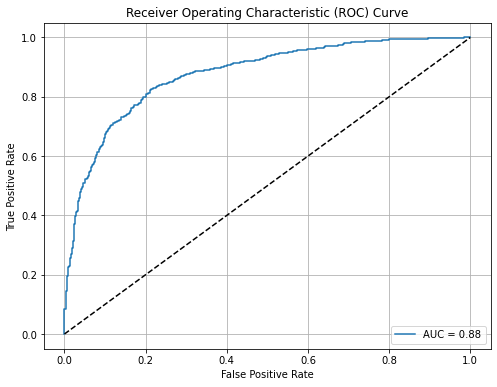

In [218]:

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Evaluates the relationship of each feature in predicting the target variable

In [219]:
# Create a new instance of RandomForestClassifier with the best hyperparameters
rf_tuned = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='log2'
)

# Fit the model on the training data
rf_tuned.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = rf_tuned.feature_importances_

# Create a dictionary with feature names and their importance scores
feature_importance_dict = dict(zip(X.columns, importance_scores))

# Sort the feature importance dictionary by value in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the top five features and their importance scores
top_features = [feature[0] for feature in sorted_feature_importance[:5]]
top_importances = [feature[1] for feature in sorted_feature_importance[:5]]

# Display the top ten feature importance in descending order
for feature, importance in sorted_feature_importance[:5]:
    print(f"{feature}: {importance}")




opinion_seas_risk: 0.17753726709542836
opinion_seas_vacc_effective: 0.13207284856199908
doctor_recc_seasonal: 0.0905732046768086
opinion_h1n1_risk: 0.06285573620811742
opinion_h1n1_vacc_effective: 0.03512269287237088


EVALUATION



The ML models developed for predicting whether someone did not receive the seasonal flu vaccine demonstrated moderate performance with an overall accuracy of approximately 78%. This indicates that the models were able to correctly identify a significant proportion of individuals who did not receive the vaccine. The specificity value of 0.84 further emphasizes the model's ability to accurately identify true negative cases, reducing the false positive rate.


However, there are several limitations that need to be considered. Firstly, the study relied on data from a single year, which may not capture the full variability and patterns of vaccine uptake across different years. This limits the generalizability of the models and their applicability to different time periods. Additionally, the imbalance in the data used for modeling could have impacted the accuracy of the predictions.

CONCLUSION

The ML models developed for predicting vaccine non-uptake showed promising results, with a moderate accuracy, correctly identifying a substantial number of individuals who did not receive the seasonal flu vaccine. The models also highlighted several features that significantly influenced the likelihood of not receiving the vaccine.

The feature 'opinion_seas_risk' indicates individuals' perception of the risk associated with the seasonal flu, and 'opinion_seas_vacc_effective' reflects their belief in the effectiveness of the vaccine. These features suggest that individuals who perceive a higher risk and have a lower belief in the vaccine's effectiveness are more likely to forego vaccination.

Another influential feature, 'doctor_recc_seasonal', represents whether individuals received a doctor's recommendation for the seasonal flu vaccine. This finding underscores the importance of healthcare providers in promoting vaccination and suggests that individuals who did not receive a doctor's recommendation were less likely to receive the vaccine.

Additionally, 'opinion_h1n1_risk' captures individuals' perception of the risk associated with the H1N1 virus, while 'opinion_h1n1_vacc_effective' reflects their belief in the effectiveness of the H1N1 vaccine. These features suggest that individuals who perceive a higher risk and have a lower belief in the vaccine's effectiveness for H1N1 are also more likely to forgo vaccination.

These findings provide valuable insights into the factors influencing vaccine non-uptake and can inform targeted interventions and communication strategies to increase vaccine uptake rates. By addressing individuals' risk perceptions, beliefs in vaccine effectiveness, and enhancing doctor's recommendations, public health efforts can be tailored to overcome barriers and improve vaccination rates. Further refinement and validation of the ML models are necessary to enhance their accuracy and applicability in real-world settings.
